In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../data/titanik.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

train_data = train[["Sex", "Pclass", "Parch", "Fare", "Embarked", "Age", "SibSp"]]
train_labels = train[["Survived"]]

In [14]:
# Naiver Classifier: 1. Klasse -> Ja, 2. Klasse -> Nein
# Zuerst: Was ist die Baseline?

survived_count = (data[data["Survived"] == 1]).shape[0]
didnt_count = (data[data["Survived"] == 0]).shape[0]
base_line = survived_count / (survived_count + didnt_count)
print(base_line)
pred_naive = (train["Pclass"] == 1)

0.3838383838383838


In [15]:
# Man unterschiedet diskrete und schwellenbasierte Klassifikatoren
# Das Alter wäre schwellenbasiert, die Klasse diskret

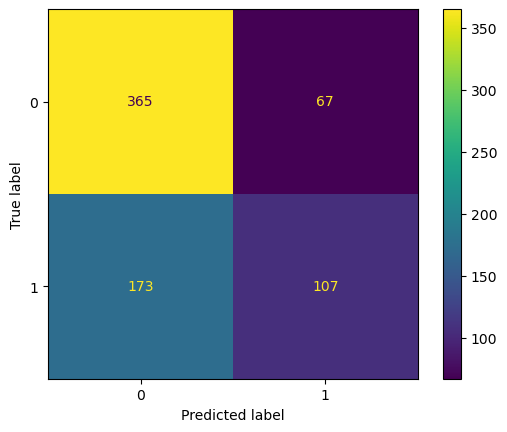

{'tpr': 0.3821428571428571, 'fpr': 0.1550925925925926, 'youden': 0.22705026455026453, 'accuracy': 0.6629213483146067, 'precision': 0.6149425287356322, 'recall': 0.3821428571428571}


In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def analyse_boolean_classifier(y_pred, y_true, show=False):
    tp_cond = (y_pred == True) & (y_true == True)
    fp_cond = (y_pred == True) & (y_true == False)
    tn_cond = (y_pred == False) & (y_true == False)
    fn_cond = (y_pred == False) & (y_true == True)
    def get_len(cond):
        return y_true[cond].shape[0]
    tp = get_len(tp_cond)
    fp = get_len(fp_cond)
    tn = get_len(tn_cond)
    fn = get_len(fn_cond)
    tpr =  tp / (tp + fn)
    fpr = fp / (fp + tn)

    if show:
        cdm = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred))

        cdm.plot()
        plt.show()

    return {
        'tpr': tpr,
        'fpr': fpr,
        'youden': tpr - fpr,
        'accuracy': (tp + tn) / (tp + tn + fp + fn),
        'precision': tp / (tp + fp) if tp + fp != 0 else 0,
        'recall': tp / (tp + fn) if tp + fp != 0 else 0
    }

train_labels_bool = train_labels["Survived"].apply(lambda n : n == 1)

print(analyse_boolean_classifier(pred_naive, train_labels_bool, show=True))

In [17]:
mean_age_survivor = train_data[train_labels_bool]["Age"].mean()
mean_age_victim = train_data[~train_labels_bool]["Age"].mean()
cutoff = (mean_age_survivor + mean_age_victim) / 2

pred_age_cutoff = train_data["Age"] > cutoff
analyse_boolean_classifier(pred_age_cutoff, train_labels_bool)

{'tpr': 0.4,
 'fpr': 0.3819444444444444,
 'youden': 0.018055555555555602,
 'accuracy': 0.5323033707865169,
 'precision': 0.4043321299638989,
 'recall': 0.4}

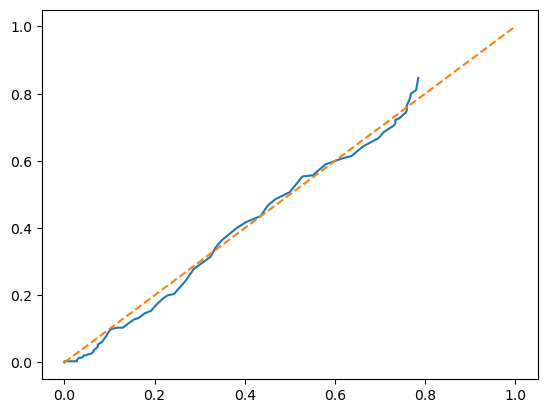

In [18]:
ages = np.arange(100)
evaluation = [analyse_boolean_classifier(train_data["Age"] > a, train_labels_bool) for a in ages]
tpr = [e['tpr'] for e in evaluation]
fpr = [e['fpr'] for e in evaluation]

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC-Kurve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Raumdiagonale')
plt.show()

In [19]:
from sklearn.decomposition import PCA

def process_data(data):
    data_processed = data[["Survived", "Age", "Fare", "Pclass", "SibSp", "Parch", "Sex"]] #Ka was Embarked ist
    data_processed.loc[:, "Sex"] = data_processed["Sex"].apply(lambda s : 0 if s == "male" else 1)

    data_processed = data_processed.dropna()
    labels_processed = data_processed["Survived"].apply(lambda n : n == 1)
    data_processed.drop(columns=["Survived"])
    return (data_processed, labels_processed)

train_data_processed, train_labels_processed = process_data(train)
test_data_processed, test_labels_processed = process_data(test)

pca = PCA(n_components=1).fit(train_data_processed)
reduced = pca.transform(train_data_processed)

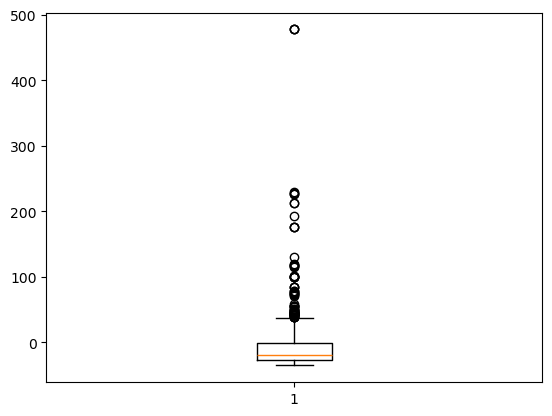

In [25]:
plt.boxplot(reduced)
plt.show()

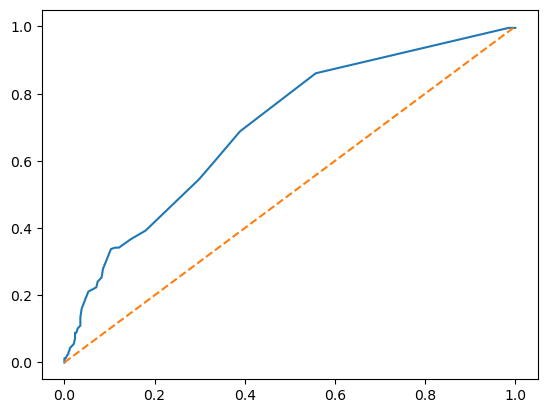

0.7575395491828785 > 0.5
Kontrolle mit Test-Set ergibt:


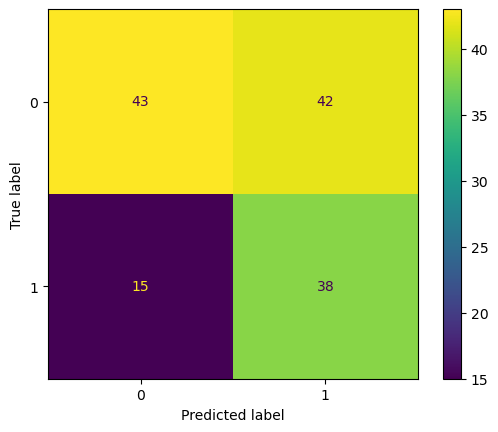

{'tpr': 0.7169811320754716, 'fpr': 0.49411764705882355, 'youden': 0.2228634850166481, 'accuracy': 0.5869565217391305, 'precision': 0.475, 'recall': 0.7169811320754716}


In [21]:

ma = np.max(reduced)
mi = np.min(reduced)

x = np.linspace(mi, ma, num=100)

evaluation = [analyse_boolean_classifier(reduced.flatten() > a, train_labels_processed) for a in x]
tpr = [e['tpr'] for e in evaluation]
fpr = [e['fpr'] for e in evaluation]
youden = [e['youden'] for e in evaluation]
plt.plot(fpr, tpr, label='ROC-Kurve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Raumdiagonale')
plt.show() # Garnich so schlecht...

analyse_boolean_classifier(reduced.flatten() > x[np.argmax(youden)], train_labels_processed)

df = pd.DataFrame({'fpr': fpr, 'tpr': tpr}).sort_values('fpr')
auc = df['tpr'].iloc[1:] @ df['fpr'].diff().dropna()
print(auc, "> 0.5")
print("Kontrolle mit Test-Set ergibt:")
test_red = pca.transform(test_data_processed)
print(analyse_boolean_classifier(test_red.flatten() > x[np.argmax(youden)], test_labels_processed, show=True))
# etwas Besser als die Baseline

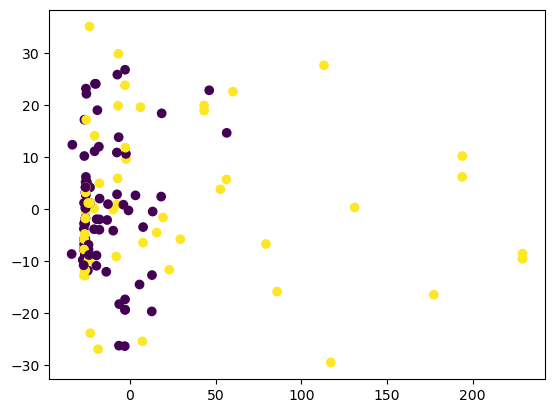

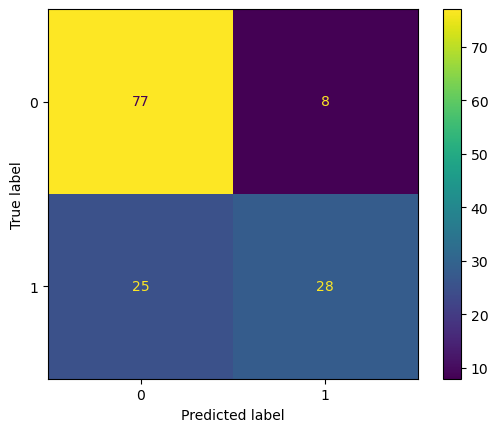

{'tpr': 0.5283018867924528,
 'fpr': 0.09411764705882353,
 'youden': 0.4341842397336293,
 'accuracy': 0.7608695652173914,
 'precision': 0.7777777777777778,
 'recall': 0.5283018867924528}

In [22]:
pca = PCA(n_components=7).fit(test_data_processed) # Hier am besten "garkeine" PCA machen, obwohl das Bild ganz nett ist aus den ersten beiden PCs
reduced2d = pca.transform(test_data_processed)
plt.scatter(reduced2d[:, 0], reduced2d[:, 1], c=test_labels_processed)

from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier().fit(reduced2d, test_labels_processed)

pred = knc.predict(pca.transform(test_data_processed))
analyse_boolean_classifier(pred, test_labels_processed, show=True)